# Filtrarea si sortarea datelor - Kepler Exoplanet Dataset
## 1. Descarcarea si citirea setului de date



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kagglehub

path = kagglehub.dataset_download("gauravkumar2525/kepler-exoplanet-dataset")

print("path=", path)

100%|██████████| 306k/306k [00:00<00:00, 773kB/s]

Extracting files...
path= C:\Users\Andreea\.cache\kagglehub\datasets\gauravkumar2525\kepler-exoplanet-dataset\versions\1


In [ ]:
file_path = os.path.join(path, "exoplanets_data.csv")
df = pd.read_csv(file_path)

df.head()

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,10797460,K00752.01,2,1.000,9.488036,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,10797460,K00752.02,2,0.969,54.418383,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
2,10811496,K00753.01,1,0.000,19.899140,14.60,638.0,39.30,5853.0,0.868,4.544,15.436
3,10848459,K00754.01,0,0.000,1.736952,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,10854555,K00755.01,2,1.000,2.525592,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509


## 2. Filtrarea datelor

### 2.1. Planete verificate (confirmate) - filtrare dupa koi_disposition

koi_disposition – Status of the exoplanet candidate (converted to numerical values): 
- "CANDIDATE" → 1 (Potential exoplanet)
- "CONFIRMED" → 2 (Verified exoplanet)
- "FALSE POSITIVE" → 0 (Not a real exoplanet)

In [30]:
df_confirmed = df[df['koi_disposition'] == 2]
print(f'Numarul planetelor confirmate: {len(df_confirmed)} din {len(df)}')
df_confirmed.head()

Numarul planetelor confirmate: 2743 din 9564


,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,10797460,K00752.01,2,1.000,9.488036,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,10797460,K00752.02,2,0.969,54.418383,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
4,10854555,K00755.01,2,1.000,2.525592,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509
5,10872983,K00756.01,2,1.000,11.094321,3.90,835.0,114.81,6046.0,0.972,4.486,15.714
6,10872983,K00756.02,2,1.000,4.134435,2.77,1160.0,427.65,6046.0,0.972,4.486,15.714


Vizualizare:

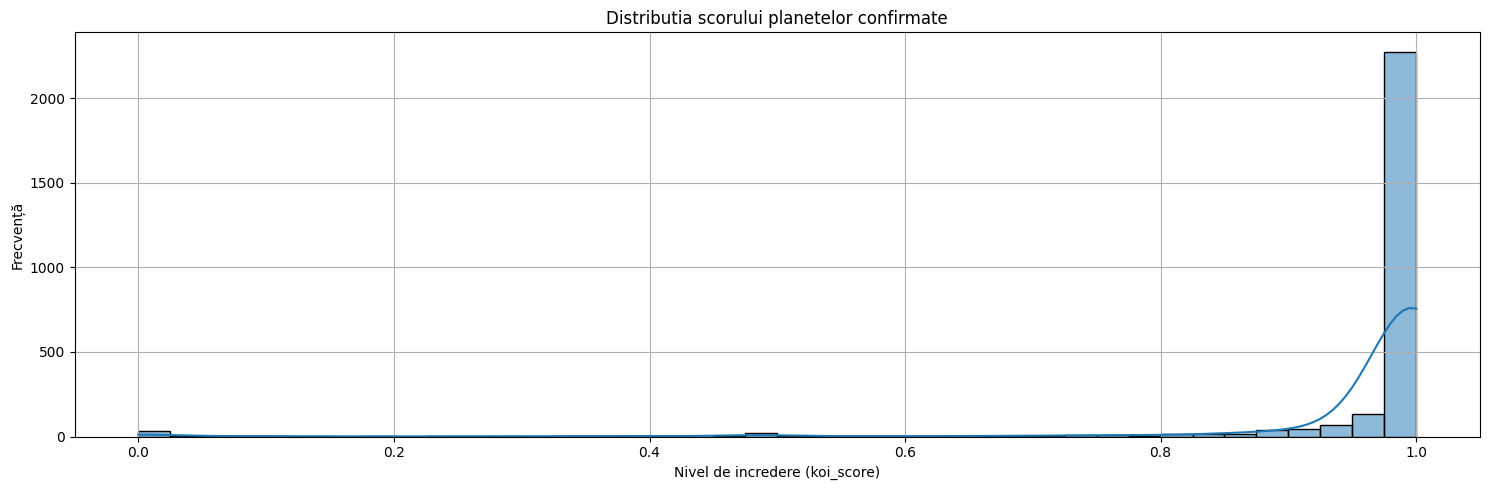

In [61]:
# Distributia koi_score-ului planetelor confirmare
plt.figure(figsize=(15, 5))
sns.histplot(df_confirmed['koi_score'].dropna(), bins=40, kde=True)
plt.title('Distributia scorului planetelor confirmate')
plt.xlabel('Nivel de incredere (koi_score)')
plt.ylabel('Frecvență')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.2. Planete locuibile raportat la energia primita - filtrare dupa koi_insol

koi_insol = fluxul de radiatie solara incidenta pe o planeta; cata energie primeste aceasta planeta de la steaua ei, comparativ cu cat primeste Pamantul de la Soare.
Deci, daca koi_insol = 1, planeta primeste exact atata energie de la steaua ei cat primim noi de la soare.

In general, ca planetele sa fie locuibile, si sa nu fie supraincalzite sau inghetate si sa existe o posibilitate de apa lichida pe acestea, koi_insol ar trebui sa fie cat mai apropiat se cel al Pamantului (intre 0.75 si 1.5).

In [37]:
df_habitable_zone = df[(df['koi_insol'] >= 0.75) & (df['koi_insol'] <= 1.5)]
print(f'Planete potential locuibile (filtrate după flux): {len(df_habitable_zone)} din {len(df)}')
df_habitable_zone.head()

Planete potential locuibile (filtrate după flux): 309 din 9564


,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
86,4139816,K00812.03,2,1.000000,46.184204,1.83,273.0,1.32,3950.0,0.493,4.754,15.954
318,10460629,K01168.01,1,0.480829,856.672115,3.87,242.0,0.81,6449.0,1.309,4.232,13.997
613,2574201,K01025.01,0,0.000000,37.478349,10.05,262.0,1.12,3687.0,0.440,4.813,15.501
667,6960913,K01361.01,2,0.998000,59.878026,2.19,273.0,1.31,4016.0,0.599,4.658,14.995
693,11176127,K01430.03,2,0.996000,77.474099,2.63,277.0,1.40,4463.0,0.611,4.677,15.415


Vizualizare:

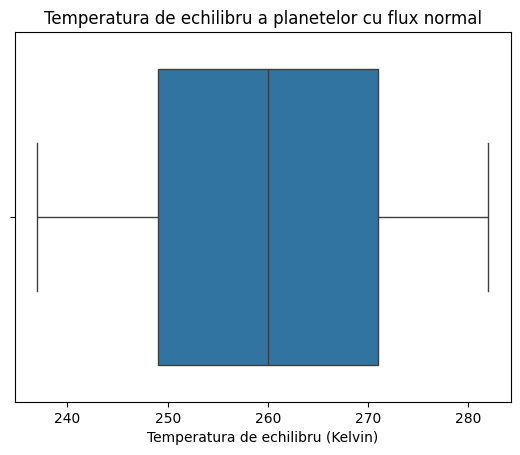

In [63]:
sns.boxplot(x=df_habitable_zone['koi_teq'])
plt.title('Temperatura de echilibru a planetelor cu flux normal')
plt.xlabel('Temperatura de echilibru (Kelvin)')
plt.show()

### 2.3. Planete locuibile raportat la energie si la raza planetara - filtrare dupa koi_insol si koi_prad

koi_prad = raza planetara raportata la raza Pamantului

Raza ne poate ajuta sa deducem tipul planetei: daca este prea mica, poate pierde atmosfera, iar daca este prea mare, cel mai probabil vorbim de o atmosfera mult prea densa sau chiar de giganti gazosi (ca Jupiter si Saturn).

In [42]:
df_earth_like = df_habitable_zone[(df_habitable_zone['koi_prad'] >= 1) & (df_habitable_zone['koi_prad'] <= 3)]
print(f'Număr de planete asemanatoare Pamantului (filtrate dupa flux si raza): {len(df_earth_like)} din {len(df_habitable_zone)}')
df_earth_like.head()

Număr de planete asemanatoare Pamantului (filtrate dupa flux si raza): 211 din 309


,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
86,4139816,K00812.03,2,1.000,46.184204,1.83,273.0,1.32,3950.0,0.493,4.754,15.954
667,6960913,K01361.01,2,0.998,59.878026,2.19,273.0,1.31,4016.0,0.599,4.658,14.995
693,11176127,K01430.03,2,0.996,77.474099,2.63,277.0,1.40,4463.0,0.611,4.677,15.415
987,10604335,K01298.02,2,0.000,92.749578,1.87,240.0,0.78,4141.0,0.582,4.684,15.847
1577,9758089,K01871.01,2,0.998,92.729725,2.81,276.0,1.38,4580.0,0.675,4.641,14.897


Vizualizare:

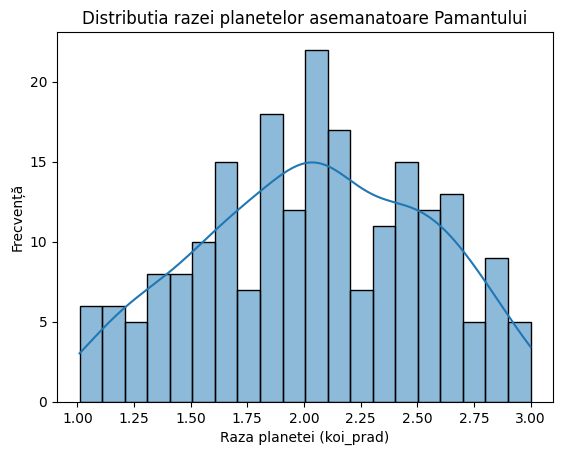

In [58]:
sns.histplot(df_earth_like['koi_prad'], bins=20, kde=True)
plt.title('Distributia razei planetelor asemanatoare Pamantului')
plt.xlabel('Raza planetei (koi_prad)')
plt.ylabel('Frecvență')
plt.show()

### 2.4. Filtrare bonus: Planete rare - gigantice, aproape de stea si foarte fierbinti

In [68]:
df_rare = df[(df['koi_prad'] > 10) & (df['koi_period'] < 2) & (df['koi_teq'] > 2000)]
print(f'Număr de planete gigantice si foarte fierbinti: {len(df_rare)} din {len(df)}')
df_rare.head()

Număr de planete gigantice si foarte fierbinti: 349 din 9564


,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
321,10485069,K01171.01,0,0.480829,0.445277,35.74,2562.0,10177.11,6167.0,1.064,4.444,15.343
322,3233043,K00966.01,0,0.000000,0.379464,59.56,3000.0,19256.81,5075.0,1.783,3.892,13.787
327,11180361,K00971.01,1,1.000000,0.533059,133.56,5862.0,277887.70,8523.0,4.051,3.559,7.748
328,5802246,K01044.01,0,0.000000,0.525154,23.61,2073.0,4391.51,5582.0,0.846,4.497,15.058
368,3344419,K01181.01,0,0.000000,0.651784,33.65,2090.0,4500.59,5555.0,1.061,4.375,14.997


## 3. Sortarea datelor

### 3.1. Sortare dupa koi_score
koi_score (0.0 - 1.0) = valoare de incredere pentru clasificarea dreapt planeta (scorul 1 inseamna ca sigur exista si sigur este planeta)

In [49]:
df_sorted_score = df.sort_values(by='koi_score', ascending=False)
print('Top 10 planete după koi_score:')
df_sorted_score.head(10)

Top 10 planete după koi_score:


,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,10797460,K00752.01,2,1.0,9.488036,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1385,9244756,K01969.01,2,1.0,16.343559,3.26,730.0,67.34,5730.0,1.056,4.394,15.017
1383,6205897,K01967.01,2,1.0,4.417693,1.57,790.0,92.16,4766.0,0.664,4.645,14.310
3088,10873260,K00535.01,2,1.0,5.852969,3.46,1056.0,293.93,6050.0,1.013,4.450,14.434
3091,11073351,K00537.01,2,1.0,2.820191,2.53,1367.0,824.92,5831.0,1.121,4.359,14.665
1380,4263293,K01895.02,2,1.0,17.281170,2.04,425.0,7.75,4347.0,0.524,4.730,15.862
1379,4263293,K01895.01,2,1.0,8.457466,1.87,540.0,20.08,4347.0,0.524,4.730,15.862
1378,11673802,K01894.01,2,1.0,5.287908,7.10,1661.0,1802.31,4994.0,3.818,3.433,13.427
1377,8689793,K01893.01,2,1.0,3.554856,1.29,1157.0,425.04,6068.0,0.831,4.565,14.053
3092,11090765,K00538.01,2,1.0,21.217123,2.97,706.0,58.63,6191.0,1.007,4.438,14.560


### 3.2. Sortare dupa koi_period (perioada oribitala, in zile)

In [50]:
df_sorted_period = df.sort_values(by='koi_period')
print('Top 10 planete cu cea mai scurta periada de orbitare')
df_sorted_period[['kepoi_name', 'koi_period']].head(10)

Top 10 planete cu cea mai scurta periada de orbitare


,kepoi_name,koi_period
6017,K03133.01,0.241843
3883,K04419.01,0.259820
534,K01079.01,0.293630
5830,K02875.01,0.299698
7241,K07859.01,0.306702
6030,K02916.01,0.306938
952,K01415.01,0.312942
922,K01345.01,0.323022
2280,K02622.01,0.328687
5831,K02879.01,0.339070


Vizualizare:

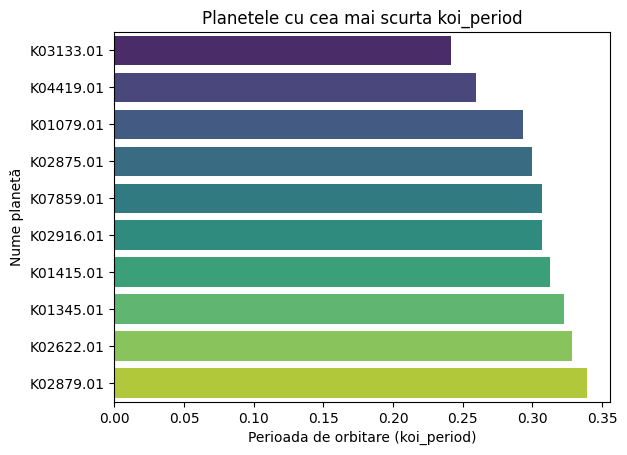

In [54]:
sns.barplot(df_sorted_period.head(10), x='koi_period', y='kepoi_name', hue='kepoi_name', palette='viridis', legend=False)
plt.title('Planetele cu cea mai scurta koi_period')
plt.xlabel('Perioada de orbitare (koi_period)')
plt.ylabel('Nume planetă')
plt.show()

## Concluzii

- Prin filtrari succesive, am identificat un subset de planete potential locuibile si alte subseturi ce ne pot fi utile mai tarziu
- Sortarile ne ofera o perspectiva rapida asupra unor obiecte de interes
- Am inclus si vizualizari pentru a intelege mai in detaliu setul de date si tipurile de obiecte din interiorul acestuia